# Exploring the Nature of OD Data

***
We wish to conduct an exploratory analysis on OD Data. Firstly, two CSV's are grabbed from BlipTrack `BlipTrack-Toronto_DT_OD_Start_End_Multiple_Outcomes_ut_20180101-20180102.csv` and `BlipTrack-Toronto_DT_OD_Others_Multiple_Outcomes_ut_20180101-20180102.csv`. The first is a binary containing data for the start of a route and the end of a route, with a 1 or 0 corresponding to whether or not that intersection was chosen as a start/end or not. The second is a table containing a particular route a vehicle has taken, with 1's and 0's corresponding to whether or not they passed a respective intersection on that route. 

<br>
We import these two tables into the alouis2 schema, under the names `startend_raw` and `others_raw`.

In [4]:
%load_ext sql
import matplotlib.pyplot as plt
import pandas as pd
import configparser
from psycopg2 import connect
import psycopg2.sql as pg
import pandas.io.sql as pandasql
from sqlalchemy import create_engine
import io


CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\Users\alouis2\Documents\Python Scripts\db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)
    

x = open('C:\\Users\\alouis2\\Documents\\Python Scripts\\andrew.txt', 'r')
x = x.readlines()[0]
%sql $x

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\sql\magic.py:4: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Bool, Int, Unicode


'Connected: alouis2@bigdata'

## Creating our Primary Tables
***
We change extract relevant data we will be working with by selecting only the columns we need. Below are the queries used to create `others_path` and `startend_path`, two tables containing relevant information from their raw counterparts. 

In [2]:
%%sql
CREATE TABLE others_path
(
  datetime_bin timestamp without time zone,
  userid bigint,  co_ba integer,  co_un integer,  co_pa integer,  du_ro integer,  du_df integer,
  du_ba integer,  du_sp integer,  du_un integer,  du_yo integer,  du_ja integer,  du_pa integer,
  qu_ro integer,  qu_df integer,  qu_st integer,  qu_ba integer,  qu_sp integer,  qu_un integer,
  qu_yo integer,  qu_ja integer,  qu_pa integer,  qu_bv integer,  rm_ba integer,  rm_sp integer,
  rm_un integer,  rm_yo integer,  rm_ja integer,  rm_pa integer,  ad_ba integer,  ad_sp integer,
  ad_un integer,  ad_yo integer,  ad_ja integer,  ad_pa integer,  kn_df integer,  kn_st integer,
  kn_ba integer,  kn_sp integer,  kn_un integer,  kn_yo integer,  kn_ja integer,  kn_pa integer,
  we_bj integer,  we_un integer,  we_yo integer,  fr_ba integer,  fr_sp integer,  fr_un integer,
  fr_yo integer,  fr_ja integer,  fr_pa integer,  fb_ba integer,  fb_sp integer,  fb_yk integer,
  ea_bv integer,  path_total integer
)
WITH (
  OIDS=FALSE
);
ALTER TABLE others_path
  OWNER TO alouis2;


(psycopg2.ProgrammingError) relation "others_path" already exists
 [SQL: 'CREATE TABLE others_path\n(\n  datetime_bin timestamp without time zone,\n  userid bigint,  co_ba integer,  co_un integer,  co_pa integer,  du_ro integer,  du_df integer,\n  du_ba integer,  du_sp integer,  du_un integer,  du_yo integer,  du_ja integer,  du_pa integer,\n  qu_ro integer,  qu_df integer,  qu_st integer,  qu_ba integer,  qu_sp integer,  qu_un integer,\n  qu_yo integer,  qu_ja integer,  qu_pa integer,  qu_bv integer,  rm_ba integer,  rm_sp integer,\n  rm_un integer,  rm_yo integer,  rm_ja integer,  rm_pa integer,  ad_ba integer,  ad_sp integer,\n  ad_un integer,  ad_yo integer,  ad_ja integer,  ad_pa integer,  kn_df integer,  kn_st integer,\n  kn_ba integer,  kn_sp integer,  kn_un integer,  kn_yo integer,  kn_ja integer,  kn_pa integer,\n  we_bj integer,  we_un integer,  we_yo integer,  fr_ba integer,  fr_sp integer,  fr_un integer,\n  fr_yo integer,  fr_ja integer,  fr_pa integer,  fb_ba integer,  fb

In [3]:
%%sql 
CREATE TABLE startend_path
(
  datetime_bin timestamp without time zone,
  userid bigint,
  s_co_ba integer,  s_co_un integer,  s_co_pa integer,  s_du_ro integer,  s_du_df integer,
  s_du_ba integer,  s_du_sp integer,  s_du_un integer,  s_du_yo integer,  s_du_ja integer,
  s_du_pa integer,  s_qu_ro integer,  s_qu_df integer,  s_qu_st integer,  s_qu_ba integer,
  s_qu_sp integer,  s_qu_un integer,  s_qu_yo integer,  s_qu_ja integer,  s_qu_pa integer,
  s_qu_bv integer,  s_rm_ba integer,  s_rm_sp integer,  s_rm_un integer,  s_rm_yo integer,
  s_rm_ja integer,  s_rm_pa integer,  s_ad_ba integer,  s_ad_sp integer,  s_ad_un integer,
  s_ad_yo integer,  s_ad_ja integer,  s_ad_pa integer,  s_kn_df integer,  s_kn_st integer,
  s_kn_ba integer,  s_kn_sp integer,  s_kn_un integer,  s_kn_yo integer,  s_kn_ja integer,
  s_kn_pa integer,  s_we_bj integer,  s_we_un integer,  s_we_yo integer,  s_fr_ba integer,
  s_fr_sp integer,  s_fr_un integer,  s_fr_yo integer,  s_fr_ja integer,  s_fr_pa integer,
  s_fb_ba integer,  s_fb_sp integer,  s_fb_yk integer,  s_ea_bv integer,  e_co_ba integer,
  e_co_un integer,  e_co_pa integer,  e_du_ro integer,  e_du_df integer,  e_du_ba integer,
  e_du_sp integer,  e_du_un integer,  e_du_yo integer,  e_du_ja integer,  e_du_pa integer,
  e_qu_ro integer,  e_qu_df integer,  e_qu_st integer,  e_qu_ba integer,  e_qu_sp integer,
  e_qu_un integer,  e_qu_yo integer,  e_qu_ja integer,  e_qu_pa integer,  e_qu_bv integer,
  e_rm_ba integer,  e_rm_sp integer,  e_rm_un integer,  e_rm_yo integer,  e_rm_ja integer,
  e_rm_pa integer,  e_ad_ba integer,  e_ad_sp integer,  e_ad_un integer,  e_ad_yo integer,
  e_ad_ja integer,  e_ad_pa integer,  e_kn_df integer,  e_kn_st integer,  e_kn_ba integer,
  e_kn_sp integer,  e_kn_un integer,  e_kn_yo integer,  e_kn_ja integer,  e_kn_pa integer,
  e_we_bj integer,  e_we_un integer,  e_we_yo integer,  e_fr_ba integer,  e_fr_sp integer,
  e_fr_un integer,  e_fr_yo integer,  e_fr_ja integer,  e_fr_pa integer,  e_fb_ba integer,
  e_fb_sp integer,  e_fb_yk integer,  e_ea_bv integer
)
WITH (
  OIDS=FALSE
);
ALTER TABLE startend_path
  OWNER TO alouis2;


(psycopg2.ProgrammingError) relation "startend_path" already exists
 [SQL: 'CREATE TABLE startend_path\n(\n  datetime_bin timestamp without time zone,\n  userid bigint,\n  s_co_ba integer,  s_co_un integer,  s_co_pa integer,  s_du_ro integer,  s_du_df integer,\n  s_du_ba integer,  s_du_sp integer,  s_du_un integer,  s_du_yo integer,  s_du_ja integer,\n  s_du_pa integer,  s_qu_ro integer,  s_qu_df integer,  s_qu_st integer,  s_qu_ba integer,\n  s_qu_sp integer,  s_qu_un integer,  s_qu_yo integer,  s_qu_ja integer,  s_qu_pa integer,\n  s_qu_bv integer,  s_rm_ba integer,  s_rm_sp integer,  s_rm_un integer,  s_rm_yo integer,\n  s_rm_ja integer,  s_rm_pa integer,  s_ad_ba integer,  s_ad_sp integer,  s_ad_un integer,\n  s_ad_yo integer,  s_ad_ja integer,  s_ad_pa integer,  s_kn_df integer,  s_kn_st integer,\n  s_kn_ba integer,  s_kn_sp integer,  s_kn_un integer,  s_kn_yo integer,  s_kn_ja integer,\n  s_kn_pa integer,  s_we_bj integer,  s_we_un integer,  s_we_yo integer,  s_fr_ba integer,\n  

## Eliminating Path Totals of 1
***
Now we have only relevant information we need for our exploratory analysis, which makes queries easier to run. Moreover, we create a column `path_total` for our table `others_path` so we now how many interections were passed for each particular route. 

<br>
Notice the discrepancy between the path data and the startend data, i.e. 21205 vs 14667 rows. This is because there are many datapoints in `others_raw` with a path total of 1. To eliminate this discrepancy, we have to eliminate all `path_total` values of 1. We do this with the following code:

In [2]:
%%sql DELETE FROM alouis2.others_path
WHERE path_total = 1;

0 rows affected.


[]

In [3]:
%sql select count(datetime_bin)from startend_path

1 rows affected.


count
14667


In [6]:
%sql select count(datetime_bin)from others_path

1 rows affected.


count
14667


As seen above, after deleting all rows with 1 path totals, the row counts are the same. Now we have for each datetime stamp and user id, an origin, destination, and path. However, this information is split accross our two schemas. We wish to combine them to facilitate analysis.


## Pivoting Start/End Data
***
Firstly, we need to pivot `startend_path`. What do we mean by pivot? We want to create a `start` and `end` column, containing a text representing the origin and destination of a vehicle. Essentially we will convert the binary table to a much more easier to read start/end table.

<br> 
Please refer to the `pivot.ipynb` to see how this was done. We now have a new table, `startend_pivot`. A few rows are selected below: 

In [4]:
%sql select * from alouis2.startend_pivot limit 5

5 rows affected.


datetime_bin,userid,start,end
2018-01-01 00:00:17,-4109236477481291089,du_yo,du_ja
2018-01-01 00:01:08,-1672501126208601408,du_pa,qu_bv
2018-01-01 00:01:11,-5833274664015405017,du_ja,du_yo
2018-01-01 00:02:08,8147950039115731659,du_pa,du_ja
2018-01-01 00:02:11,2538540623439968621,kn_df,du_df


This is much easier to read. Now we create a view to join `startend_pivot` and `others_path` to create a complete table summarizing our OD Data. 

In [5]:
%sql select * from complete limit 5;

5 rows affected.


datetime_bin,userid,start,end,co_ba,co_un,co_pa,du_ro,du_df,du_ba,du_sp,du_un,du_yo,du_ja,du_pa,qu_ro,qu_df,qu_st,qu_ba,qu_sp,qu_un,qu_yo,qu_ja,qu_pa,qu_bv,rm_ba,rm_sp,rm_un,rm_yo,rm_ja,rm_pa,ad_ba,ad_sp,ad_un,ad_yo,ad_ja,ad_pa,kn_df,kn_st,kn_ba,kn_sp,kn_un,kn_yo,kn_ja,kn_pa,we_bj,we_un,we_yo,fr_ba,fr_sp,fr_un,fr_yo,fr_ja,fr_pa,fb_ba,fb_sp,fb_yk,ea_bv,path_total
2018-01-01 00:00:17,-4109236477481291089,du_yo,du_ja,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:01:08,-1672501126208601408,du_pa,qu_bv,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:01:11,-5833274664015405017,du_ja,du_yo,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:02:08,8147950039115731659,du_pa,du_ja,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2018-01-01 00:02:11,2538540623439968621,kn_df,du_df,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Now we have a table with a date, userid, start, end, and binary representation of a path. This will be very useful and it will be our primary table when analyzing discrepancies in our OD data. 

## Comparing OD Data and Segment Data
***
We wish to start comparing segment data with OD data. In order to do this, we need relevant segment data. The observation schema is huge, so it's important to only select the parameters and columns we want. 

<br>
In our case, we are only interested in date on `2018-01-01`, as this is the date relevant to our OD Data. Moreover, we are only interested in the `startpoint` and `endpoint` columns, as they tell us the beginning and end of a segment that we can compare with origin/destination values. 

<br>
Most importantly, we only need segments relevant to our date. In the bluetooth schema, there are a tonne of arterial and other roads that are not related to our OD analyis. For this reason, we filter out the `observations_201801` data according to relevant analysis id's. We obtain these analysis id's via the `bt_segments` table. From this, we create the following view:

In [6]:
%sql select * from segs limit 5;

5 rows affected.


userid,datetime_bin,startpoint_name,endpoint_name
-9221220690800223438,2018-01-01 10:24:08,FB_YK,FR_UN
-9219933307520670431,2018-01-01 10:22:01,FB_BA,FR_BA
-9219806034649301548,2018-01-01 10:24:05,CO_BA,CO_UN
-9219806034649301548,2018-01-01 00:46:13,CO_UN,CO_BA
-9216702922520912820,2018-01-01 16:03:31,QU_JA,QU_YO


Now we join the two views, `segs` and `complete`. 

In [7]:
%%sql
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin::date = complete.datetime_bin::date
AND segs.userid = complete.userid
LIMIT 5

5 rows affected.


datetime_bin,userid,origin,destination,path_total,segment_start,segment_end
2018-01-01 10:26:25,-9221220690800223438,fb_yk,fr_un,2,FB_YK,FR_UN
2018-01-01 10:22:01,-9219933307520670431,fb_ba,fr_ba,2,FB_BA,FR_BA
2018-01-01 00:46:13,-9219806034649301548,co_un,co_ba,2,CO_BA,CO_UN
2018-01-01 10:24:05,-9219806034649301548,co_ba,co_un,2,CO_BA,CO_UN
2018-01-01 00:46:13,-9219806034649301548,co_un,co_ba,2,CO_UN,CO_BA


## Verifying Start/End Timestamp
***
Now we have OD information, a column for path total, and two columns representing the start and end of the corresponding segment. 

<br>
Before we begin investigating discrepancies, let's verify whether the timestamps for OD Data are start or end timestamps. To do this, we select an arbitrary user id from `complete` and `segs`. If the time stamp from `complete` is equivalent to the last time stamp in `segs` for our userid, then the time stamp is an end time. Conversely, if the time stamp from `complete` is equivalent to the first time stamp in `segs` for our userid, then the time stamp is a start time.

In [8]:
%%sql

SELECT * FROM segs
WHERE userid = -8424651304893524140
ORDER BY datetime_bin

3 rows affected.


userid,datetime_bin,startpoint_name,endpoint_name
-8424651304893524140,2018-01-01 00:06:32,DU_SP,QU_SP
-8424651304893524140,2018-01-01 00:09:12,QU_SP,QU_BA
-8424651304893524140,2018-01-01 00:10:45,QU_BA,QU_ST


In [9]:
%%sql 

SELECT datetime_bin, userid, complete.start, complete.end FROM complete
WHERE userid = -8424651304893524140; 

1 rows affected.


datetime_bin,userid,start,end
2018-01-01 00:10:45,-8424651304893524140,du_sp,qu_st


We can see from the above queries that the last time stamp from `segs` is the same as the time stamp from `complete`. Therefore, for our OD Data, we can conclude that the timestamps are ***End Times***. 

## Investigating Discrepancies
***

Now we are interested in seeing discrepancies between the number of segments per path vs the path total. Ideally, for each path of $x$ points, we would have $x-1$ segments, because each segment contains two points. 


<br> Let's investigate this by counting the segments per path via a group by clause. 

In [ ]:
%%sql 

WITH final as(
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin::date = complete.datetime_bin::date
AND segs.userid = complete.userid
WHERE path_total > 1)

SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
FROM final
GROUP BY datetime_bin, userid, origin, destination, path_total
LIMIT 5

Just from this sample of 20 rows from our group by query, we can see that discrepancies between segment data and OD data exist. Let's see what percentage of these segment/od combinations are ideal, i.e for a OD path with path total $x$, the segment total is $x-1$. 

<br>
Note that we have **13115** `userid` and `datetime_bin` combinations. 

In [14]:
%%sql
WITH ideals as (WITH final as(
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin::date = complete.datetime_bin::date
AND segs.userid = complete.userid
WHERE path_total > 1)

                
SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
FROM final
GROUP BY datetime_bin, userid, origin, destination, path_total
having count(distinct(final.*)) = path_total -1)  

select count(*) from ideals; 

1 rows affected.


count
3191


Let's call these 'ideal' combos perfect paths. This means that of 13115 paths, 3191 are perfect. 

<br>
Therefore approximately **24.3**% of Origin/Destination Paths can be represented via Bluetooth Segment data. 

What about bluetooth segments that are missing 1 segment per path? Or 2 segments per path? Or have more segments than path points?

We define our discrepancy to be `segment_total` - `path_total`. We wish to investigate discrepancies that are not -1, i.e. those that are imperfect

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


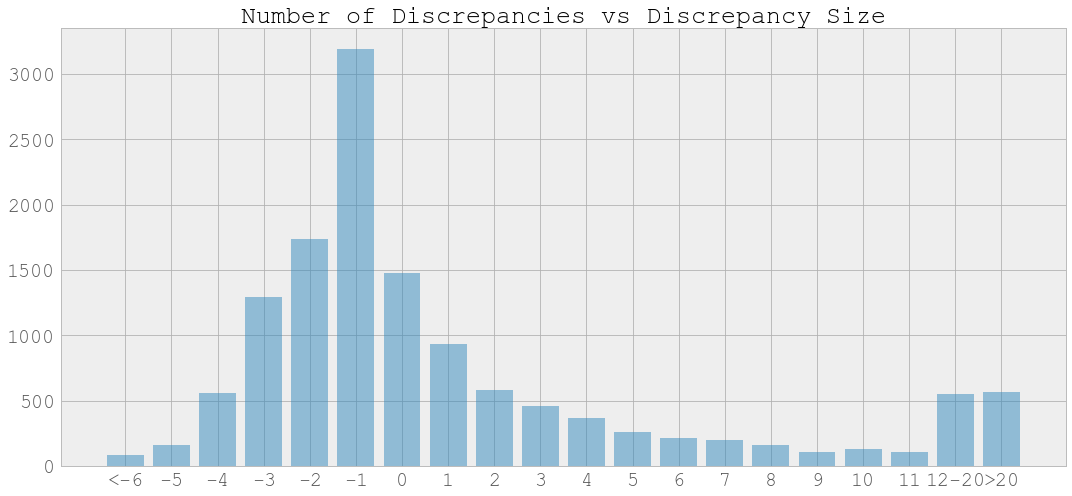

In [16]:
y = [562, 548, 102, 126, 108, 162, 196, 210, 260, 369, 455, 577, 935, 1479, 3191, 1739, 1290, 559, 161, 86]
x = [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6]
labels = [str(i) for i in x]
labels[1] = '12-20'
labels[0] = '>20'
labels[(len(labels)-1)] = '<-6'

plt.figure(figsize = (15,7))
plt.xticks(x, labels)
pd.options.display.mpl_style = 'default'
plt.bar(x, y, align='center', alpha=0.5)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title("Number of Discrepancies vs Discrepancy Size", fontsize = 25)
plt.tight_layout()
plt.show()


From the above graph, it seems as though as `segment_total` appraches `path_total`, the count increases. More interestingly, as there is an increasing positive difference between `segment_total` and `path_total`, the count decreases. Note that we excluded individual results for discrepancies of size 12 and onwards for the sake space. 

## Digging Deeper- Changing Time Intervals
***

The above analysis gives us a good rough idea of what is going on with the data. Clearly not all bluetooth segments represent OD paths, and discrepancies between these data sets can vary depending on other elements in the date (i.e. path total). 

<br>
#### Joining on Date may cause underrepresentation
*****
Notice how we are joining OD and segment data on two variables: date, and userid. We join on date as the time stamps for the data sets vary greatly. Now consider the following scenario:
A car its path at 1 AM on a Monday. The bluetooth segment data shows segments with timestamps at 11:40 PM Sunday, 12:30 AM Monday, and 1 AM Monday. By joining on date, in this scenario, the Sunday segment would be missing on the join.

<br> 
We hypothesize that this may be a reason for the under representation of segment data. To mitigate this, we will perform the join on a smaller time interval. Determining the interval will require some investigation. 

The logic of determining the interval is as follows:

* We Left join `segments` and `complete` on `datetime_bin` and `userid`, only for userid's with multiple timestamps. 
* We look for nulls in the above query. We find userid's with a large amount of null values that also contain a joined timestamp and userid from `complete`. 
* We look at the beginning of the nulls and the end, then we calculate the difference. This will give us an appropriate interval for our interest. 

<br>
We complete the join of interest by creating a view called `joined`. A sample of the first few rows can be seen below.

In [19]:
%%sql

select * from joined limit 5; 

5 rows affected.


userid,datetime_bin,startpoint_name,endpoint_name,cdatetime_bin,cuserid
-9219806034649301548,2018-01-01 00:46:13,CO_UN,CO_BA,2018-01-01 00:46:13,-9219806034649301548
-9219806034649301548,2018-01-01 10:24:05,CO_BA,CO_UN,2018-01-01 10:24:05,-9219806034649301548
-9216702922520912820,2018-01-01 16:03:31,QU_JA,QU_YO,None,None
-9216702922520912820,2018-01-01 16:09:26,QU_YO,QU_UN,None,None
-9214166793301162557,2018-01-01 23:27:13,FB_SP,FR_SP,None,None


We find the userid's with the most nulls by  executing the following query: 

In [23]:
%%sql 
select userid, count(userid) as c
from joined
where cuserid is null
group by userid
order by c desc
limit 5

5 rows affected.


userid,c
1983310123336577193,167
1207754401363453046,149
6673949081404878332,125
-5399468081705131680,94
-6043027741035473340,93


The first three are likely to be taxis. We find the userid with a count of 94. 

In [59]:
%%sql 

select * from joined where userid in (-5399468081705131680);


(psycopg2.ProgrammingError) window function row_number requires an OVER clause
LINE 2: and row_number() > 10 and row_number() < 33;
            ^
 [SQL: 'select * from joined where userid in (-5399468081705131680) \nand row_number() > 10 and row_number() < 33;']


The interval (2018-01-01 03:25:03, 2018-01-01 05:04:08) has relatively smooth and continuous timestamps inbetween. The interval length is approximately 1.5 hours. We choose 1.5 hours as hour interval for analysis. 

In [24]:
%%sql

WITH final as(
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin > complete.datetime_bin - INTERVAL '1.5 hour'
AND segs.datetime_bin <= complete.datetime_bin
AND segs.userid = complete.userid
WHERE path_total > 1)

SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
FROM final
GROUP BY datetime_bin, userid, origin, destination, path_total
LIMIT 5

5 rows affected.


datetime_bin,userid,segment_total,origin,destination,path_total
2018-01-01 00:00:17,-4109236477481291089,1,du_yo,du_ja,2
2018-01-01 00:01:11,-5833274664015405017,1,du_ja,du_yo,2
2018-01-01 00:02:08,8147950039115731659,1,du_pa,du_ja,2
2018-01-01 00:02:47,1200906276903573645,1,fr_ja,du_ja,5
2018-01-01 00:02:59,-4164760066955224419,2,du_df,qu_ro,3


There are 12205 rows in this table (less than when we joined by date, which makes sense). We find the combos that are a perfect match. 


In [60]:
%%sql
WITH ideals as (WITH final as(
SELECT complete.datetime_bin, complete.userid, complete.start as origin, complete.end as destination, complete.path_total, startpoint_name as segment_start, endpoint_name as segment_end
FROM segs
LEFT JOIN alouis2.complete
ON segs.datetime_bin > complete.datetime_bin - INTERVAL '1.5 hour'
AND segs.datetime_bin <= complete.datetime_bin
AND segs.userid = complete.userid
WHERE path_total > 1)

                
SELECT datetime_bin, userid, count(distinct(final.*)) as segment_total, origin, destination, path_total
FROM final
GROUP BY datetime_bin, userid, origin, destination, path_total
having count(distinct(final.*)) = path_total -1)  

select count(*) from ideals; 

1 rows affected.


count
4261


There are 4261 rows in this table. 4261/12205 = 35%. This is 10% higher than our previous data. 


<br>
This is a good improvement from our previous query. Using our new query, we will investigate the perfect matches, i.e. the segments that perfectly represent an OD Path. 

We rerun discrepancy size vs number of discrepancies with our newly selected time interval. 


C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


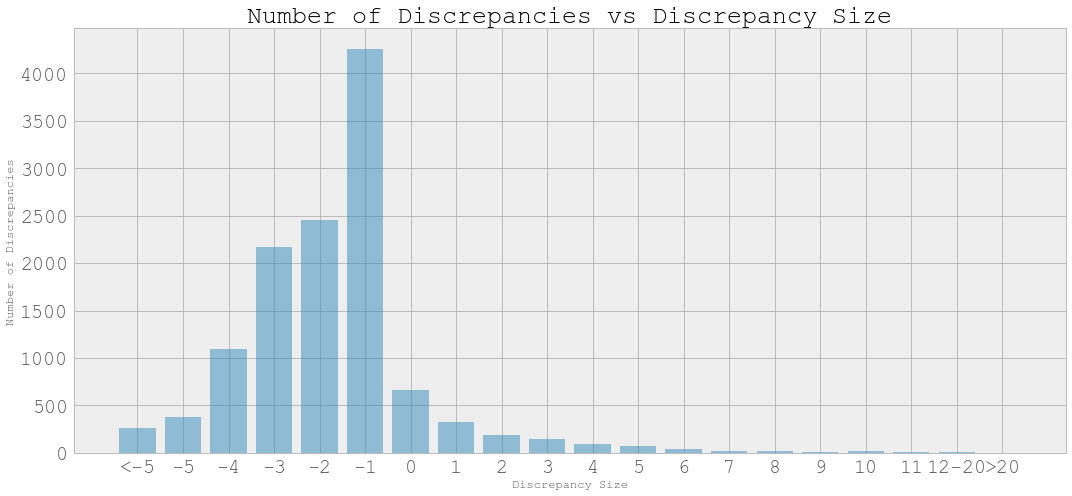

In [62]:
y = [1, 9, 8, 14, 8, 20, 24, 42, 67, 91,  141, 190, 325, 657, 4261, 2452, 2165, 1095, 373, 261]
x = [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6]

labels = [str(i) for i in x]
labels[1] = '12-20'
labels[0] = '>20'
labels[(len(labels)-1)] = '<-5'

plt.figure(figsize = (15,7))
plt.xticks(x, labels)
pd.options.display.mpl_style = 'default'
plt.bar(x, y, align='center', alpha=0.5)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title("Number of Discrepancies vs Discrepancy Size", fontsize = 25)
plt.xlabel("Discrepancy Size")
plt.ylabel("Number of Discrepancies")
plt.tight_layout()
plt.show()

This graph is much different than our previous time interval. The drop from -1 to 0 is extremely sharp, and overall there are are fewer positive discrepancy sizes, i.e. where `segment_total` $>$ `path_total`. 

<br>
We hypothesize that as path total increases, the percentage of segment data that represents OD data decreases. Let's graph this: 

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


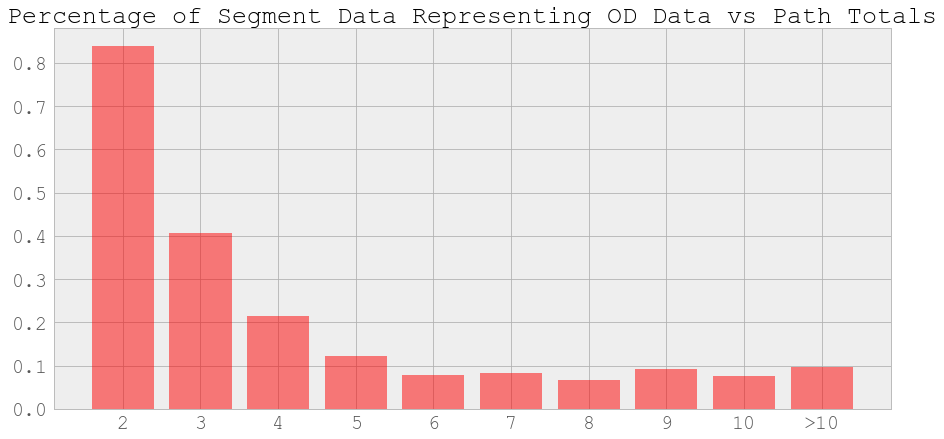

In [11]:
y = [2475/2952, 927/2276,  371/1737, 179/1463,  98/1245, 64/781, 37/552, 29/313, 16/208, 65/678]
x = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.figure(figsize = (15,7))
pd.options.display.mpl_style = 'default'
plt.bar(x, y, align='center', alpha=0.5, color = 'red')
labels = [str(i) for i in x]
labels[len(labels)-1] = '>10' 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.xticks(x, labels)
plt.title("Percentage of Segment Data Representing OD Data vs Path Totals", fontsize = 25)
#plt.tight_layout()
plt.show()


It seems as though our hypothesis is correct- as path total increases, i.e. a path becomes more complex, the percentage of bluetooth segment data that accurately represents OD data decreases. 

## Investigating Matches
***

Before we begin to analyze perfect segment/od data points, we summarize the matches we have in a view in sql. We create three views to help with this, and we primarily use the view `perfectcombos` to analyze our matches. Here's what `perfectcombos` looks like: 

In [43]:
%%sql

select * from perfectcombos limit 5; 

5 rows affected.


datetime_bin,userid,origin,destination,path_total,segment_start,segment_end
2018-01-01 10:26:25,-9221220690800223438,fb_yk,fr_un,2,FB_YK,FR_UN
2018-01-01 10:22:01,-9219933307520670431,fb_ba,fr_ba,2,FB_BA,FR_BA
2018-01-01 10:24:05,-9219806034649301548,co_ba,co_un,2,CO_BA,CO_UN
2018-01-01 00:46:13,-9219806034649301548,co_un,co_ba,2,CO_UN,CO_BA
2018-01-01 16:09:44,-9216702922520912820,qu_ja,qu_un,3,QU_YO,QU_UN


Essentially, this view is a table containing every OD pair that matches with bluetooth segment data, i.e. $x-1$ segment combos for each path_total $x$. Along with this is the end timestmap and userid. 

Our general goal is to see whether these segments correspond to the path the vehicle took in our OD data. Are they the same? If not, how big is the discrepancy? Before we answer such questions, we need to pivot our table `others_path`, as the binary matrix is extremely difficult to read. We pivot it by creating a new column `path` containing a list of strings of all the points the vehicle passes along the path. The code for this can be found in the `pivot.ipynb`. Here is our resulting table, which we call `others_pivot`. 

In [44]:
%%sql
select * from others_pivot limit 5;

5 rows affected.


datetime_bin,userid,start,end,path,path_total
2018-01-01 00:00:17,-4109236477481291089,du_yo,du_ja,"['du_yo', 'du_ja']",2
2018-01-01 00:01:08,-1672501126208601408,du_pa,qu_bv,"['du_pa', 'qu_bv']",2
2018-01-01 00:01:11,-5833274664015405017,du_ja,du_yo,"['du_ja', 'du_yo']",2
2018-01-01 00:02:08,8147950039115731659,du_pa,du_ja,"['du_pa', 'du_ja']",2
2018-01-01 00:02:11,2538540623439968621,kn_df,du_df,"['kn_df', 'du_df']",2


Much better. The data is much more easier to read. Now, we join this data with our view with matches, `perfectcombos`. We will read this into a pandas dataframe as we will use pandas to analyze this join. 

In [45]:
string = '''SELECT * FROM alouis2.perfectcombos 
            NATURAL JOIN others_pivot'''
df = pandasql.read_sql(pg.SQL(string), con)
df.head(5)

,datetime_bin,userid,path_total,origin,destination,segment_start,segment_end,start,end,path
0,2018-01-01 10:26:25,-9221220690800223438,2,fb_yk,fr_un,FB_YK,FR_UN,fb_yk,fr_un,"['fb_yk', 'fr_un']"
1,2018-01-01 10:22:01,-9219933307520670431,2,fb_ba,fr_ba,FB_BA,FR_BA,fb_ba,fr_ba,"['fb_ba', 'fr_ba']"
2,2018-01-01 10:24:05,-9219806034649301548,2,co_ba,co_un,CO_BA,CO_UN,co_ba,co_un,"['co_ba', 'co_un']"
3,2018-01-01 00:46:13,-9219806034649301548,2,co_un,co_ba,CO_UN,CO_BA,co_un,co_ba,"['co_un', 'co_ba']"
4,2018-01-01 16:09:44,-9216702922520912820,3,qu_ja,qu_un,QU_YO,QU_UN,qu_ja,qu_un,"['qu_ja', 'qu_yo', 'qu_un']"


Now what we wish to see is whether for every segment pair, does the segment_start and segment_end fall in our path list. We suspect that for path_totals of two, this is absolutely true. Let's verify this result:

In [46]:
string = '''SELECT datetime_bin, userid, path_total, origin, destination, 
            segment_start, segment_end, path FROM 
            (SELECT * FROM perfectcombos
            NATURAL JOIN others_pivot 
            WHERE path_total = 2) f'''
twoonly = pandasql.read_sql(pg.SQL(string), con)

def find_2(df):
    l = []
    for i in range(len(df)): 
        if df['segment_start'].values[i].lower() not in df['path'].values[i] or df['segment_end'].values[i].lower() not in df['path'].values[i]:
            l.append(df.loc[i,])
    return l
    
len(find_2(twoonly))/len(twoonly) * 100 

7.118385991625428

Not what we were expecting. For path totals of 2, 7.12% of the segments do not match. We will put the list generated by `find(df)` in to a dataframe to analyze later. 

In [47]:
notmatching_2 = pd.DataFrame.from_records(find_2(twoonly), columns=('datetime_bin', 'userid', 'path_total', 'origin', 'destination', 'segment_start', 'segment_end', 'path'))
notmatching_2.head(3)

,datetime_bin,userid,path_total,origin,destination,segment_start,segment_end,path
0,2018-01-01 19:40:30,-9120335971942659923,2,fb_sp,fb_sp,FB_SP,FB_YK,"['fb_sp', 'fb_sp']"
1,2018-01-01 11:29:45,-9118201504088476968,2,fr_un,fb_sp,FR_YO,FR_UN,"['fr_un', 'fb_sp']"
2,2018-01-01 19:38:02,-8971740012410652059,2,qu_pa,qu_pa,QU_BV,QU_PA,"['qu_pa', 'qu_pa']"


Given this discrepancy exists for path totals of 2, i.e. a car going from Point A to Point B, we now have some reason to believe that this discrepancy exists for more complex paths, and may even increase. We will make a function that finds the rows where not all segments fall in our path list. 

In [48]:
string = '''SELECT datetime_bin, userid, path_total, origin, destination, 
            segment_start, segment_end, path FROM 
            (SELECT * FROM perfectcombos
            NATURAL JOIN others_pivot 
            WHERE path_total != 2) f'''
df = pandasql.read_sql(pg.SQL(string), con)
def find(df): 
    l = []
    i = 0 
    while i < len(df)-1: 
        if df['datetime_bin'].values[i] == df['datetime_bin'].values[i+1]:
            if df['segment_start'].values[i].lower() not in df['path'].values[i] or df['segment_end'].values[i].lower() not in df['path'].values[i]:
                l.append(df.loc[i,])
                i += 1
            else:
                i += 1
        else:
            i += 1
    return l 

find(df)[0:3]

[datetime_bin                                   2018-01-01 10:51:16
 userid                                        -9191093230214430340
 path_total                                                       7
 origin                                                       co_ba
 destination                                                  we_bj
 segment_start                                                DU_DF
 segment_end                                                  DU_BA
 path             ['co_ba', 'du_ba', 'qu_ba', 'rm_ba', 'ad_ba', ...
 Name: 4, dtype: object,
 datetime_bin                                   2018-01-01 10:51:16
 userid                                        -9191093230214430340
 path_total                                                       7
 origin                                                       co_ba
 destination                                                  we_bj
 segment_start                                                QU_DF
 segment_end           

We put this list into a dataframe called `notmatching`. This dataframe can be seen below: 

In [49]:
notmatching = pd.DataFrame.from_records(find(df), columns=('datetime_bin', 'userid', 'path_total', 'origin', 'destination', 'segment_start', 'segment_end', 'path'))
notmatching.head(3)

,datetime_bin,userid,path_total,origin,destination,segment_start,segment_end,path
0,2018-01-01 10:51:16,-9191093230214430340,7,co_ba,we_bj,DU_DF,DU_BA,"['co_ba', 'du_ba', 'qu_ba', 'rm_ba', 'ad_ba', ..."
1,2018-01-01 10:51:16,-9191093230214430340,7,co_ba,we_bj,QU_DF,DU_DF,"['co_ba', 'du_ba', 'qu_ba', 'rm_ba', 'ad_ba', ..."
2,2018-01-01 10:51:16,-9191093230214430340,7,co_ba,we_bj,KN_DF,QU_DF,"['co_ba', 'du_ba', 'qu_ba', 'rm_ba', 'ad_ba', ..."


In [50]:
string = '''SELECT distinct(datetime_bin, userid) FROM 
            (SELECT * FROM perfectcombos
            NATURAL JOIN others_pivot
            WHERE path_total != 2) f; '''
df = pandasql.read_sql(pg.SQL(string), con)

len(notmatching.groupby(['datetime_bin', 'userid']).count())/len(df) * 100


11.900826446280991

So the percentage of non matching segments for path totals > 2 is **11.9%**. 

<br>
We combine `nonmatching_2` with `nonmatching`, to get a complete dataframe containing all non matching paths and segments. First, we find a grand total percentage of non-matching segments.  We then put this dataframe into sql. 

In [51]:
notmatching = notmatching_2.append(notmatching)
notmatching.head(5)

,datetime_bin,userid,path_total,origin,destination,segment_start,segment_end,path
0,2018-01-01 19:40:30,-9120335971942659923,2,fb_sp,fb_sp,FB_SP,FB_YK,"['fb_sp', 'fb_sp']"
1,2018-01-01 11:29:45,-9118201504088476968,2,fr_un,fb_sp,FR_YO,FR_UN,"['fr_un', 'fb_sp']"
2,2018-01-01 19:38:02,-8971740012410652059,2,qu_pa,qu_pa,QU_BV,QU_PA,"['qu_pa', 'qu_pa']"
3,2018-01-01 11:42:19,-8876820604301638763,2,fr_ja,fr_ja,FR_JA,KN_JA,"['fr_ja', 'fr_ja']"
4,2018-01-01 10:41:12,-8832865037004904890,2,fr_ba,co_ba,FR_SP,FR_BA,"['fr_ba', 'co_ba']"


In [52]:
string = '''SELECT distinct(datetime_bin, userid) FROM 
            (SELECT * FROM perfectcombos
            NATURAL JOIN others_pivot) f; '''
df = pandasql.read_sql(pg.SQL(string), con)
len(notmatching.groupby(['datetime_bin', 'userid']))/len(df) * 100

8.639108221086856

So the total percentage of segments that do not fall into corresponding paths is **8.64%.** 

In [53]:
CONFIG.read(r'C:\Users\alouis2\Documents\Python Scripts\engine.cfg')
engine = create_engine(CONFIG['engine']['e'])
conn=engine.raw_connection()
cur = conn.cursor()
output = io.StringIO()
notmatching.to_csv(output, sep='\t', header=False, index=False)
output.seek(0)
contents = output.getvalue()
cur.copy_from(output, 'alouis2.nonmatching_segs', null="") #null values become ''   
conn.commit()

We summarize our results with the following graph: 

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


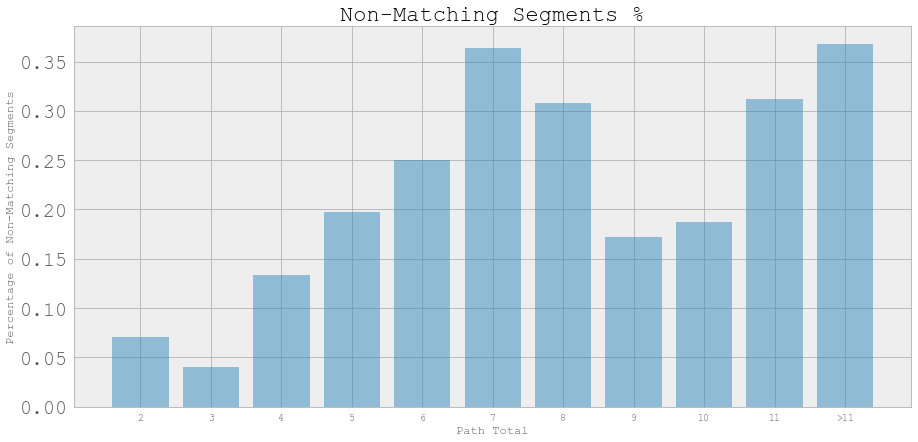

In [54]:
string = '''SELECT * FROM alouis2.perfectcombos 
            NATURAL JOIN others_pivot'''
df = pandasql.read_sql(pg.SQL(string), con)

x = [[2, len(notmatching.loc[notmatching['path_total'] == 2])/len(df.loc[df['path_total'] ==2])], 
     [3, len(notmatching.loc[notmatching['path_total'] == 3].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==3].groupby(['datetime_bin', 'userid']))],
     [4, len(notmatching.loc[notmatching['path_total'] == 4].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==4].groupby(['datetime_bin', 'userid']))],
     [5, len(notmatching.loc[notmatching['path_total'] == 5].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==5].groupby(['datetime_bin', 'userid']))],
     [6, len(notmatching.loc[notmatching['path_total'] == 6].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==6].groupby(['datetime_bin', 'userid']))],
     [7, len(notmatching.loc[notmatching['path_total'] == 7].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==7].groupby(['datetime_bin', 'userid']))],
     [8, len(notmatching.loc[notmatching['path_total'] == 8].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==8].groupby(['datetime_bin', 'userid']))],
     [9, len(notmatching.loc[notmatching['path_total'] == 9].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==9].groupby(['datetime_bin', 'userid']))],
     [10, len(notmatching.loc[notmatching['path_total'] == 10].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==10].groupby(['datetime_bin', 'userid']))],
     [11, len(notmatching.loc[notmatching['path_total'] == 11].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total'] ==11].groupby(['datetime_bin', 'userid']))],
     [12, len(notmatching.loc[notmatching['path_total'] > 11].groupby(['datetime_bin', 'userid']))/len(df.loc[df['path_total']  > 11].groupby(['datetime_bin', 'userid']))]]
summary = pd.DataFrame(x, columns = ['Path Total', 'Non-Matching Segments %'])
labels = list(summary['Path Total'])
labels = [str(i) for i in labels]
labels[8] = '10'
labels[9] = '11'
labels[10] = '>11'

pd.options.display.mpl_style = 'default'
plt.figure(figsize = (15,7))
plt.bar((summary['Path Total']), summary['Non-Matching Segments %'], align='center', alpha=0.5)
plt.xticks(list(summary['Path Total']), labels)
plt.rc('ytick', labelsize=20) 
plt.title("Non-Matching Segments %", fontsize = 22)
plt.xlabel("Path Total")
plt.ylabel("Percentage of Non-Matching Segments")
plt.show()

From the above, we see a pattern: as the path total increases (i.e. the path becomes more complex), the percentage of non-matching segments increases. 

<br>

Below are a few examples of missing segments, in addition to corresponding timestamps for the time segments. 

### Example 1
***
In this example, we can see that for all `startpoint_name` and `endpoint_name` values fall into our path list except for one: `WE_YO`. 

In [55]:
%%sql 

with example as (select * from perfectcombos 
natural join others_pivot
where path_total = 6
and userid = -9158546835467209628)

select segs.userid, example.datetime_bin as endtime,  segs.datetime_bin as timestamp, example.origin, example.destination,  segs.startpoint_name, segs.endpoint_name, example.path, example.path_total  from segs
inner join example on example.userid = segs.userid and example.segment_start = segs.startpoint_name and example.segment_end = segs.endpoint_name
where segs.userid = -9158546835467209628
order by segs.datetime_bin; 

5 rows affected.


userid,endtime,timestamp,origin,destination,startpoint_name,endpoint_name,path,path_total
-9158546835467209628,2018-01-01 23:21:59,2018-01-01 22:12:39,fb_sp,fb_yk,WE_YO,WE_UN,"['fb_sp', 'we_bj', 'kn_un', 'we_un', 'fr_un', 'fb_yk']",6
-9158546835467209628,2018-01-01 23:21:59,2018-01-01 22:17:38,fb_sp,fb_yk,WE_UN,WE_BJ,"['fb_sp', 'we_bj', 'kn_un', 'we_un', 'fr_un', 'fb_yk']",6
-9158546835467209628,2018-01-01 23:21:59,2018-01-01 23:21:12,fb_sp,fb_yk,KN_UN,FR_UN,"['fb_sp', 'we_bj', 'kn_un', 'we_un', 'fr_un', 'fb_yk']",6
-9158546835467209628,2018-01-01 23:21:59,2018-01-01 23:21:59,fb_sp,fb_yk,FB_SP,FB_YK,"['fb_sp', 'we_bj', 'kn_un', 'we_un', 'fr_un', 'fb_yk']",6
-9158546835467209628,2018-01-01 23:21:59,2018-01-01 23:21:59,fb_sp,fb_yk,FR_UN,FB_YK,"['fb_sp', 'we_bj', 'kn_un', 'we_un', 'fr_un', 'fb_yk']",6


### Example 2
***
Here are a few paths of path totals of 2. For the first path, `FR_SP` is missing, and for the second path `FR_YO` is missing. 

In [41]:
%%sql 

with example as (select * from perfectcombos 
natural join others_pivot
where path_total = 2
and userid in (-9118201504088476968,-8832865037004904890)
)

select segs.userid,example.datetime_bin as endtime,  segs.datetime_bin as timestamp, example.origin, example.destination,  segs.startpoint_name, segs.endpoint_name, example.path, example.path_total  from segs
inner join example on example.userid = segs.userid and example.segment_start = segs.startpoint_name and example.segment_end = segs.endpoint_name
where segs.userid in (-9118201504088476968,-8832865037004904890)
order by segs.datetime_bin; 


2 rows affected.


userid,endtime,timestamp,origin,destination,startpoint_name,endpoint_name,path,path_total
-8832865037004904890,2018-01-01 10:41:12,2018-01-01 10:38:15,fr_ba,co_ba,FR_SP,FR_BA,"['fr_ba', 'co_ba']",2
-9118201504088476968,2018-01-01 11:29:45,2018-01-01 11:26:07,fr_un,fb_sp,FR_YO,FR_UN,"['fr_un', 'fb_sp']",2


Example 3
***
Below is a more complex path. `CO_PA`, `CO_UN`, `CO_BA` do not fall into the path list. 

In [18]:
%%sql

with example as (select * from perfectcombos 
natural join others_pivot

where userid = -8980809001129171111)

select segs.userid, example.datetime_bin as endtime, segs.datetime_bin as timestamp,  example.origin, example.destination,  segs.startpoint_name, segs.endpoint_name, example.path, example.path_total  from segs
inner join example on example.userid = segs.userid and example.segment_start = segs.startpoint_name and example.segment_end = segs.endpoint_name
where segs.userid = -8980809001129171111
order by segs.datetime_bin

9 rows affected.


userid,endtime,timestamp,origin,destination,startpoint_name,endpoint_name,path,path_total
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 00:11:00,du_un,rm_sp,CO_PA,CO_UN,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 00:16:22,du_un,rm_sp,CO_UN,CO_BA,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 00:59:34,du_un,rm_sp,CO_UN,DU_UN,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 01:00:49,du_un,rm_sp,DU_UN,QU_UN,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 01:06:47,du_un,rm_sp,QU_UN,QU_SP,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 01:09:46,du_un,rm_sp,QU_SP,QU_BA,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 01:16:38,du_un,rm_sp,FR_BA,FB_BA,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 01:25:56,du_un,rm_sp,FB_BA,FB_SP,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10
-8980809001129171111,2018-01-01 01:28:40,2018-01-01 01:28:40,du_un,rm_sp,RM_UN,RM_SP,"['du_un', 'qu_un', 'rm_un', 'fb_sp', 'fb_ba', 'fr_ba', 'qu_ba', 'ad_sp', 'qu_sp', 'rm_sp']",10


#### Matching Segments Conclusions
***

Here is a brief summary for what was found with respect to matching segments, i.e. segments who appear to correspond with a particular path, but the segments **may not** fall in the path list. 

* 7.11% of segments don't match with their corresponding paths
* 8.64% of segments don't match with their corresponding paths with path total = 2
* 11.9% of segments don't match with their corresponding paths with path total > 2
* As path total increases, the percentage of segments that do not match with their corresponding paths increases as well. 

## Investigating Non-Matches 
***
Previously, we estimated that 35% of OD data can be represented by segment data (excluding the discrepancies found above). We now wish to investigate the other 65%. 